In [1]:
#import library

In [2]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import time, datetime
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
#1mport a 311 NYC service request.
Service_Requests=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/Users/reema/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
Service_Requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
Service_Requests.shape

(300698, 53)

In [6]:
Service_Requests.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
#missing value
missv=Service_Requests.isnull()
summissvalues=missv.sum()
print(summissvalues)

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [8]:
Service_Requests[Service_Requests['Closed Date'].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,32303348,12/30/2015 05:13:42 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,32294519,12/29/2015 10:44:50 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,32296487,12/29/2015 07:09:13 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,03/29/2015 02:40:19 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,03/29/2015 08:50:15 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,03/29/2015 08:44:13 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,03/29/2015 01:55:35 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Service_Requests[Service_Requests['Unique Key']==32305700]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Service_Requests.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [11]:
#2
Service_Requests['Closed Date']=pd.to_datetime(Service_Requests['Closed Date'])
Service_Requests['Closed Date'].dtype

dtype('<M8[ns]')

In [12]:
Service_Requests['Created Date']=pd.to_datetime(Service_Requests['Created Date'])
Service_Requests['Created Date'].dtype

dtype('<M8[ns]')

In [13]:
Service_Requests['Request_Closing_Time']=Service_Requests['Closed Date']-Service_Requests['Created Date']



In [14]:
Service_Requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02


In [15]:
#3

In [16]:
def convertHour(TimeD):
    d=TimeD.days
    h=round(TimeD.seconds/3600,2)
    tot=(d*24)+h
    return tot

In [17]:
Service_Requests['Hours_of_Request_Closing'] = Service_Requests['Request_Closing_Time'].apply(convertHour)


In [18]:
Service_Requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Hours_of_Request_Closing
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,0.92
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1.44
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,4.86
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,7.75
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3.45


In [19]:
import math

In [20]:
def HourSection(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 > hr >= 2.0):
        return 'Acceptable'
    elif (6.0 > hr >= 4.0):
        return 'Slow'
    else:
        return 'Very Slow'

In [21]:
Service_Requests['Request_Closing_Time_section'] = Service_Requests['Hours_of_Request_Closing'].apply(HourSection)


In [22]:
Service_Requests['Request_Closing_Time_section'].head()

0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_section, dtype: object

In [23]:
Service_Requests['Request_Closing_Time_section'].value_counts()

Fast           115550
Acceptable      77195
Very Slow       63388
Slow            42401
Unspecified      2164
Name: Request_Closing_Time_section, dtype: int64

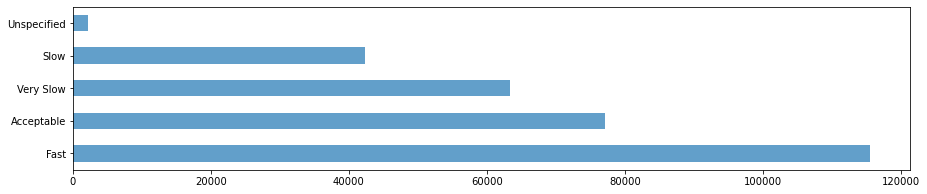

In [24]:
Service_Requests['Request_Closing_Time_section'].value_counts().plot(kind="barh", alpha=0.7, figsize=(15,3))
plt.show()

In [25]:
Service_Requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Hours_of_Request_Closing,Request_Closing_Time_section
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,0.92,Fast
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1.44,Fast
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,4.86,Slow
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,7.75,Very Slow
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3.45,Acceptable


In [26]:
month = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
print(month)
print(month[12])


1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
dtype: object
Dec


In [27]:
Service_Requests['Created Date'].dtype

dtype('<M8[ns]')

In [28]:
def getM(d):
    v = str(d)
    datey = datetime.datetime.strptime(v, "%Y-%m-%d %H:%M:%S")
    return month[datey.month]

In [29]:
print(Service_Requests['Created Date'][0])
print(getM(Service_Requests['Created Date'][0]))

2015-12-31 23:59:45
Dec


In [30]:
Service_Requests['Aplly_Month'] = Service_Requests['Created Date'].apply(getM)
Service_Requests['Aplly_Month']

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
300693    Mar
300694    Mar
300695    Mar
300696    Mar
300697    Mar
Name: Aplly_Month, Length: 300698, dtype: object

In [31]:
Service_Requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Hours_of_Request_Closing,Request_Closing_Time_section,Aplly_Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,0.92,Fast,Dec
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1.44,Fast,Dec
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,4.86,Slow,Dec
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,7.75,Very Slow,Dec
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3.45,Acceptable,Dec


In [32]:
month=Service_Requests['Aplly_Month'].value_counts()
month

May    36437
Sep    35427
Jun    35315
Aug    34956
Jul    34888
Oct    32605
Nov    30773
Dec    30521
Apr    27305
Mar     2471
Name: Aplly_Month, dtype: int64

May    36437
Sep    35427
Jun    35315
Aug    34956
Jul    34888
Oct    32605
Nov    30773
Dec    30521
Apr    27305
Mar     2471
Name: Aplly_Month, dtype: int64

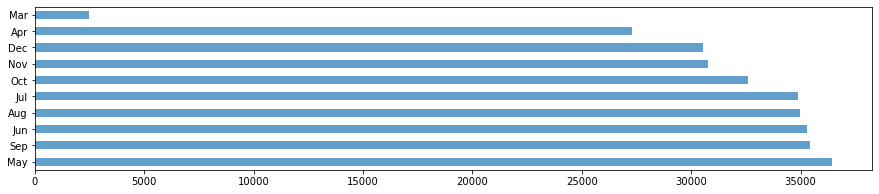

In [33]:
month.plot(kind="barh", alpha=0.7, figsize=(15,3))
month

In [34]:
Service_Requests['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

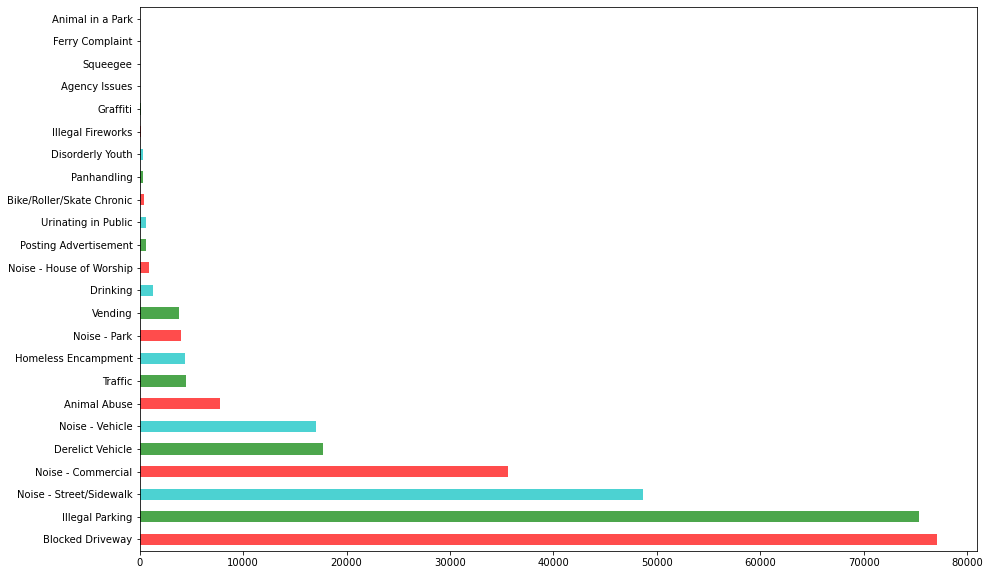

In [35]:
Service_Requests['Complaint Type'].value_counts().plot(kind="barh", color=list('rgc'), alpha=0.7, figsize=(15,10))
plt.show()

In [36]:
Service_Requests['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

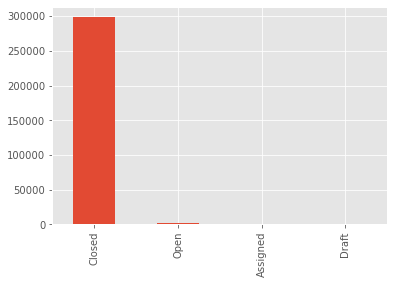

In [14]:
from matplotlib import style
style.use('ggplot')
Service_Requests['Status'].value_counts().plot(kind='bar')
plt.show()

In [37]:
#4

In [38]:
Service_Requests['City'].isnull().sum()

2614

In [39]:
Service_Requests['City'].fillna('Not Available', inplace=True)

In [40]:
Service_Requests['City'].head()

0    NEW YORK
1     ASTORIA
2       BRONX
3       BRONX
4    ELMHURST
Name: City, dtype: object

In [41]:
Service_Requests['City']

0              NEW YORK
1               ASTORIA
2                 BRONX
3                 BRONX
4              ELMHURST
              ...      
300693    Not Available
300694    RICHMOND HILL
300695         BROOKLYN
300696            BRONX
300697         NEW YORK
Name: City, Length: 300698, dtype: object

In [42]:
Service_Requests_grouped = Service_Requests.groupby(['City', 'Complaint Type'])

In [43]:
Service_Requests_mean = Service_Requests_grouped.mean()['Hours_of_Request_Closing']
Service_Requests_mean.isnull().sum()

4

In [44]:
Service_Requests_grouped = Service_Requests.groupby(['City','Complaint Type']).agg({'Hours_of_Request_Closing': 'mean'})
Service_Requests_grouped


Hours_of_Request_Closing
City     Complaint Type                                   
ARVERNE  Animal Abuse                             2.153158
         Blocked Driveway                         2.526000
         Derelict Vehicle                         2.968889
         Disorderly Youth                         3.595000
         Drinking                                 0.240000
...                                                    ...
Woodside Blocked Driveway                         6.405455
         Derelict Vehicle                         4.965000
         Illegal Parking                          5.219500
         Noise - Commercial                       2.390000
         Noise - Street/Sidewalk                  3.410000

[782 rows x 1 columns]

In [45]:
Service_Requests_grouped[Service_Requests_grouped['Hours_of_Request_Closing'].isnull()]


Hours_of_Request_Closing
City          Complaint Type                                    
Not Available Ferry Complaint                                NaN
              Noise - House of Worship                       NaN
              Panhandling                                    NaN
              Posting Advertisement                          NaN

In [46]:
print(Service_Requests_grouped)

                                  Hours_of_Request_Closing
City     Complaint Type                                   
ARVERNE  Animal Abuse                             2.153158
         Blocked Driveway                         2.526000
         Derelict Vehicle                         2.968889
         Disorderly Youth                         3.595000
         Drinking                                 0.240000
...                                                    ...
Woodside Blocked Driveway                         6.405455
         Derelict Vehicle                         4.965000
         Illegal Parking                          5.219500
         Noise - Commercial                       2.390000
         Noise - Street/Sidewalk                  3.410000

[782 rows x 1 columns]


In [47]:
Service_Requests_grouped_withoutna = Service_Requests_grouped.dropna()


In [48]:
Service_Requests_grouped_withoutna.isnull().sum()

Hours_of_Request_Closing    0
dtype: int64

In [49]:
print(Service_Requests_grouped_withoutna)


                                  Hours_of_Request_Closing
City     Complaint Type                                   
ARVERNE  Animal Abuse                             2.153158
         Blocked Driveway                         2.526000
         Derelict Vehicle                         2.968889
         Disorderly Youth                         3.595000
         Drinking                                 0.240000
...                                                    ...
Woodside Blocked Driveway                         6.405455
         Derelict Vehicle                         4.965000
         Illegal Parking                          5.219500
         Noise - Commercial                       2.390000
         Noise - Street/Sidewalk                  3.410000

[778 rows x 1 columns]


In [50]:
Service_Requests_sorted = Service_Requests_grouped_withoutna.sort_values(['City', 'Hours_of_Request_Closing'])
Service_Requests_sorted

Hours_of_Request_Closing
City     Complaint Type                                   
ARVERNE  Drinking                                 0.240000
         Vending                                  0.480000
         Urinating in Public                      0.690000
         Panhandling                              1.030000
         Noise - Park                             1.285000
...                                                    ...
Woodside Noise - Commercial                       2.390000
         Noise - Street/Sidewalk                  3.410000
         Derelict Vehicle                         4.965000
         Illegal Parking                          5.219500
         Blocked Driveway                         6.405455

[778 rows x 1 columns]

In [75]:
#5
import scipy.stats as stats
from math import sqrt

In [52]:
Service_Requests['Complaint Type'].value_counts()


Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [53]:
top5_type = Service_Requests['Complaint Type'].value_counts()[:5]
top5_type

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [54]:
top5_names = top5_type.index
top5_names


Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [55]:
sample = Service_Requests.loc[Service_Requests['Complaint Type'].isin(top5_names), ['Complaint Type', 'Hours_of_Request_Closing']]

sample.head()



,Complaint Type,Hours_of_Request_Closing
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45


In [56]:
sample.shape

(254312, 2)

In [57]:
sample.isnull().sum()


Complaint Type                 0
Hours_of_Request_Closing    2059
dtype: int64

In [58]:
sample.dropna(how='any', inplace=True)
sample.isnull().sum()

Complaint Type              0
Hours_of_Request_Closing    0
dtype: int64

In [59]:
sample.shape

(252253, 2)

In [60]:
sample1 = sample[sample['Complaint Type'] == top5_names[0]].Hours_of_Request_Closing
sample1.head()


1     1.44
2     4.86
7     1.80
9     1.38
10    7.80
Name: Hours_of_Request_Closing, dtype: float64

In [62]:
sample2 = sample[sample['Complaint Type'] == top5_names[1]].Hours_of_Request_Closing
sample2.head()


3    7.75
4    3.45
5    1.89
6    1.96
8    8.55
Name: Hours_of_Request_Closing, dtype: float64

In [63]:
sample3 = sample[sample['Complaint Type'] == top5_names[2]].Hours_of_Request_Closing
sample3.head()

0     0.92
12    2.48
19    0.78
38    0.49
54    1.50
Name: Hours_of_Request_Closing, dtype: float64

In [64]:
sample4 = sample[sample['Complaint Type'] == top5_names[3]].Hours_of_Request_Closing
sample4.head()

17    0.85
18    2.93
22    1.26
29    2.50
30    1.99
Name: Hours_of_Request_Closing, dtype: float64

In [65]:
sample5 = sample[sample['Complaint Type'] == top5_names[4]].Hours_of_Request_Closing
sample5.head()

14     10.49
151     3.95
255     1.36
256     4.13
295     0.75
Name: Hours_of_Request_Closing, dtype: float64

In [66]:
print(sample1.isnull().sum())
print(sample2.isnull().sum())
print(sample3.isnull().sum())
print(sample4.isnull().sum())
print(sample5.isnull().sum())

0
0
0
0
0


In [67]:
stats.f_oneway(sample1, sample2, sample3, sample4, sample5)

F_onewayResult(statistic=1799.598683238952, pvalue=0.0)

In [68]:
top5_location = Service_Requests['City'].value_counts()[:5]
top5_location

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

In [69]:
top5_location_names = top5_location.index
top5_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [71]:
sample_data_location_c_type = Service_Requests.loc[(Service_Requests['Complaint Type'].isin(top5_names)) & (Service_Requests['City'].isin(top5_location_names)), ['Complaint Type', 'City']]
sample_data_location_c_type.head()


,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK


In [72]:
pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City']
            , margins=True)



City,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,12755,28148,2818,2072,2142,47935
Derelict Vehicle,1953,5181,954,537,1766,10391
Illegal Parking,7859,27462,1421,12128,4886,53756
Noise - Commercial,2434,11463,429,14550,678,29554
Noise - Street/Sidewalk,8892,13356,339,20433,819,43839
All,33893,85610,5961,49720,10291,185475


In [73]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City']))


In [74]:
print(ch2)
print(p_value)

40522.79928349593
0.0


In [76]:
# p_value < 0.05 so complinat location not independet